<a href="https://colab.research.google.com/github/Skyofwhite/TeamFroze/blob/main/fileAlter_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

아래 이미지처럼 데이터 준비

ex) 사과일 경우

images에는 사과 이미지

labels에는 사과 레이블

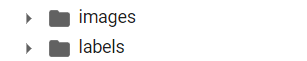

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**클래스 번호 변경 (경로 설정 필요)**

옵션: SELECT,ALL

SELECT: 지정한 클래스 번호를 원하는 클래스 번호로 변경

ALL: 모든 클래스 번호를 원하는 수만큼 더해서 변경

In [ ]:
from glob import glob
from enum import Enum

class Option(Enum):
  ALL = 1 #모든 클래스 지정한 만큼 변경
  SELECT = 2 #선택한 클래스 번호 지정한 수로 변경

#.txt 폴더 경로 끝에 항상 '*.txt' 붙이기(경로 설정)
txt_path = '/content/drive/MyDrive/labels/*.txt'

select_option = Option.SELECT

#Option.ALL
plus_class_index = 0    #n

#Option.SELECT
find_class_index = 0    #전
change_class_index = 1  #후

check_change = False
txt_list = glob(txt_path)
txt_list.sort()
count = 0
#print(len(txt_list))

for txt_file in txt_list:
  with open(txt_file, 'r+') as f:
    lines = f.readlines()
    new_lines = []

    for i in range(len(lines)):
      #print(f"line {i}: ", lines[i])

      if select_option == Option.SELECT:
        if len(lines[i]) > 0 and lines[i][0] == f"{find_class_index}":
          count += 1
          this_line = f"{change_class_index}" + lines[i][1:]
          new_lines.append(this_line)
          check_change = True

      elif select_option == Option.ALL:
        if len(lines[i]) > 0:
          count += 1
          this_line = f"{int(lines[i][0]) + plus_class_index}" + lines[i][1:]
          new_lines.append(this_line)
          check_change = True

    if check_change:
      f.seek(0)
      f.truncate()
      f.write("".join(new_lines))
      check_change = False

print(count, '개 변경완료')

0 개 변경완료


**이미지 파일 이름 변경(경로 설정 필요)**

기본명: refimage_**이름**

예) 아보카도: refimage_abo

In [ ]:
from glob import glob
import os

#현재 사진(경로 설정)
jpg_path = '/content/drive/MyDrive/images/*.jpg'

#이름 저장 위치(경로 설정)
jpg_save_path = '/content/drive/MyDrive/images'

#파일명 지정(이름 설정)
name = "refimage_abo"

#시작 번호
j = 0

jpg_list = glob(jpg_path)
jpg.sort()
for jpg_file in jpg_list:
  os.rename(f"{jpg_file}", jpg_save_path + f'/{name}{j:06d}.jpg') # 06d => 6자리
  j += 1

**레이블 파일 이름 변경(경로 설정 필요)**

In [ ]:
from glob import glob
import os

#현재 텍스트(경로 설정)
txt_path = '/content/drive/MyDrive/labels/*.txt'

#레이블 저장 위치(경로 설정)
txt_save_path = '/content/drive/MyDrive/labels'

#파일명 지정(이름 설정)
name = "refimage_abo"

#시작 번호
t = 0

txt_list = glob(txt_path)
txt.sort()
for txt_file in txt_list:
  os.rename(f"{txt_file}", txt_save_path + f'/{name}{t:06d}.txt') # 06d => 6자리
  t += 1

**아래 이미지처럼 폴더 준비**

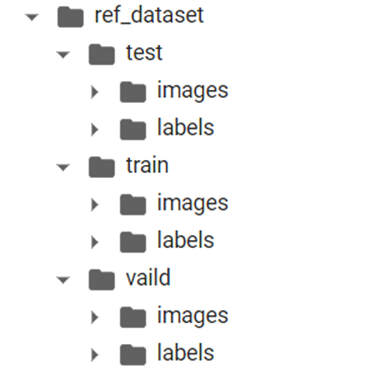

**모든 경로 자신에게 맞게 꼭 변경하기!!**

이미지는 이미지폴더에 레이블은 레이블폴더에

In [ ]:
import shutil
from sklearn.model_selection import train_test_split
from glob import glob

# 데이터셋 다운받았을 때 test, train, vaild로 나뉘어져 있다면 하나로 합쳐서 images, labels 폴더에 넣기(위 사진 처럼 구성)
# 미리 세가지 폴더 생성하기 test, train, vaild 세가지 폴더 각각 images, labels 폴더 만들기
# 예) test/images | test/labels
# 저장할 비율 test : train : vaild => 1 : 8 : 1

#경로 설정
jpg_path = '/content/drive/MyDrive/images/*.jpg'
txt_path = '/content/drive/MyDrive/labels/*.txt'

jpg_list = glob(jpg_path)
txt_list = glob(txt_path)
jpg_list.sort()
txt_list.sort()

#train_img_list, val_img_list, test_img_list
train_img_list, val_img_list = train_test_split(jpg_list, test_size = 0.1, random_state=1, shuffle = True)
train_img_list, test_img_list = train_test_split(train_img_list, test_size = 0.1, random_state=1, shuffle = True)
print(len(train_img_list), len(val_img_list),len(test_img_list))

#train_txt_list, val_txt_list, test_txt_list
train_txt_list, val_txt_list = train_test_split(txt_list, test_size = 0.1, random_state=1, shuffle = True)
train_txt_list, test_txt_list = train_test_split(train_txt_list, test_size = 0.1, random_state=1, shuffle = True)
print(len(train_txt_list), len(val_txt_list),len(test_txt_list))

print(train_img_list[0], train_txt_list[0])
print(val_img_list[0], val_txt_list[0])
print(test_img_list[0], test_txt_list[0])

# 현재 작업경로와 상관없이 절대경로를 입력
# shutil.move('이동시킬 파일 경로', '파일을 이동시킬 폴더의 경로')

#test폴더(경로 설정하기)
for test_img in test_img_list:
  shutil.copy(f'{test_img}', '/content/drive/MyDrive/ref_dataset/test/images')

for test_txt in test_txt_list:
  shutil.copy(f'{test_txt}', '/content/drive/MyDrive/ref_dataset/test/labels')

#train 폴더(경로 설정하기)
for train_img in train_img_list:
  shutil.copy(f'{train_img}', '/content/drive/MyDrive/ref_dataset/train/images')

for train_txt in train_txt_list:
  shutil.copy(f'{train_txt}', '/content/drive/MyDrive/ref_dataset/train/labels')

#vaild 폴더(경로 설정하기)
for val_img in val_img_list:
  shutil.copy(f'{val_img}', '/content/drive/MyDrive/ref_dataset/vaild/images')

for val_txt in val_txt_list:
  shutil.copy(f'{val_txt}', '/content/drive/MyDrive/ref_dataset/vaild/labels')


1108 137 124
1108 137 124
/content/drive/MyDrive/images/refimage_abo000217.jpg /content/drive/MyDrive/labels/refimage_abo000217.txt
/content/drive/MyDrive/images/refimage_abo000881.jpg /content/drive/MyDrive/labels/refimage_abo000881.txt
/content/drive/MyDrive/images/refimage_abo000681.jpg /content/drive/MyDrive/labels/refimage_abo000681.txt
/content/drive/MyDrive/images/refimage_abo001171.jpg /content/drive/MyDrive/labels/refimage_abo001171.txt


**정리가 끝난 데이터셋은 잘 저장해두기**

**새로운 데이터셋 정리를 위해 폴더를 비우거나 다시 생성해주기!**

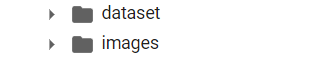

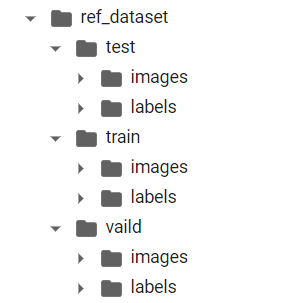